In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker

# Initialize faker
fake = Faker()

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Number of records
num_records = 1000

In [3]:
# Book titles
book_titles = [
    "Valuation Fundamentals",
    "Corporate Finance Basics",
    "Investment Strategies",
    "Financial Modeling Guide",
    "Equity Analysis Handbook",
    "Risk Management Essentials",
    "Portfolio Management",
    "Business Valuation Mastery",
    "Stock Market Guide",
    "Accounting Principles"
]

# Genres
genres = ["Finance", "Investment", "Accounting", "Economics", "Business"]

# Regions
regions = ["North America", "Europe", "Asia", "Africa", "South America"]

# Customer Gender
genders = ["Male", "Female"]

# Age Groups
age_groups = ["18-25", "26-35", "36-45", "46-60", "60+"]

In [4]:
# Generate dataset
data = {
    "Transaction_ID": [fake.uuid4() for _ in range(num_records)],
    
    "Book_Title": np.random.choice(book_titles, num_records),
    
    "Genre": np.random.choice(genres, num_records),
    
    "Customer_Age_Group": np.random.choice(age_groups, num_records),
    
    "Customer_Gender": np.random.choice(genders, num_records),
    
    "Region": np.random.choice(regions, num_records),
    
    "Units_Sold": np.random.randint(1, 20, num_records),
    
    "Price_per_Unit": np.round(np.random.uniform(10, 100, num_records), 2),
    
    "Cost_per_Unit": np.round(np.random.uniform(5, 50, num_records), 2),
    
    "Purchase_Date": [fake.date_between(start_date="-2y", end_date="today") for _ in range(num_records)]
}

In [5]:
df = pd.DataFrame(data)

# Calculate Sales
df["Total_Sales"] = df["Units_Sold"] * df["Price_per_Unit"]

# Calculate Cost
df["Total_Cost"] = df["Units_Sold"] * df["Cost_per_Unit"]

# Calculate Profit
df["Profit"] = df["Total_Sales"] - df["Total_Cost"]

# Calculate Profit Margin %
df["Profit_Margin"] = (df["Profit"] / df["Total_Sales"]) * 100

# Round Profit Margin
df["Profit_Margin"] = df["Profit_Margin"].round(2)

# Show first rows
df.head()

,Transaction_ID,Book_Title,Genre,Customer_Age_Group,Customer_Gender,Region,Units_Sold,Price_per_Unit,Cost_per_Unit,Purchase_Date,Total_Sales,Total_Cost,Profit,Profit_Margin
0,a1fb2ff3-edf6-4767-a72f-ebce025f3bdb,Portfolio Management,Finance,18-25,Female,South America,7,89.73,30.75,2026-01-29,628.11,215.25,412.86,65.73
1,078ca0d1-8431-4b09-85a2-3a414a6475a4,Financial Modeling Guide,Economics,60+,Male,South America,17,83.45,46.96,2024-12-16,1418.65,798.32,620.33,43.73
2,ce36a814-ab84-4140-9741-e2f1f734588c,Business Valuation Mastery,Accounting,36-45,Female,Africa,6,11.71,43.62,2024-06-27,70.26,261.72,-191.46,-272.50
3,7896dc22-e1ba-4116-badd-5d92014579e1,Equity Analysis Handbook,Economics,46-60,Female,Europe,19,76.23,12.68,2025-12-03,1448.37,240.92,1207.45,83.37
4,a3af1e71-88f1-4f5d-9334-c29b42f193b0,Portfolio Management,Economics,36-45,Male,Africa,6,28.76,24.65,2024-05-02,172.56,147.90,24.66,14.29


In [6]:
# Dataset info
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      1000 non-null   object 
 1   Book_Title          1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Customer_Age_Group  1000 non-null   object 
 4   Customer_Gender     1000 non-null   object 
 5   Region              1000 non-null   object 
 6   Units_Sold          1000 non-null   int64  
 7   Price_per_Unit      1000 non-null   float64
 8   Cost_per_Unit       1000 non-null   float64
 9   Purchase_Date       1000 non-null   object 
 10  Total_Sales         1000 non-null   float64
 11  Total_Cost          1000 non-null   float64
 12  Profit              1000 non-null   float64
 13  Profit_Margin       1000 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 109.5+ KB


,Units_Sold,Price_per_Unit,Cost_per_Unit,Total_Sales,Total_Cost,Profit,Profit_Margin
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.32200,54.27926,27.394830,562.354340,284.265970,278.088370,27.551110
std,5.37673,25.88062,13.206115,411.189103,216.469373,372.842742,69.892083
min,1.00000,10.08000,5.030000,10.240000,5.830000,-692.930000,-327.670000
25%,6.00000,31.89750,15.690000,220.590000,107.100000,23.007500,14.012500
50%,11.00000,53.86500,27.585000,477.705000,226.415000,199.070000,49.635000
75%,15.00000,77.05000,38.082500,825.915000,426.702500,501.410000,71.667500
max,19.00000,99.91000,49.990000,1892.400000,944.490000,1783.910000,94.890000


In [7]:
# Save dataset
df.to_csv("valuation_books_step_dataset.csv", index=False)

print("Dataset saved successfully!")

Dataset saved successfully!


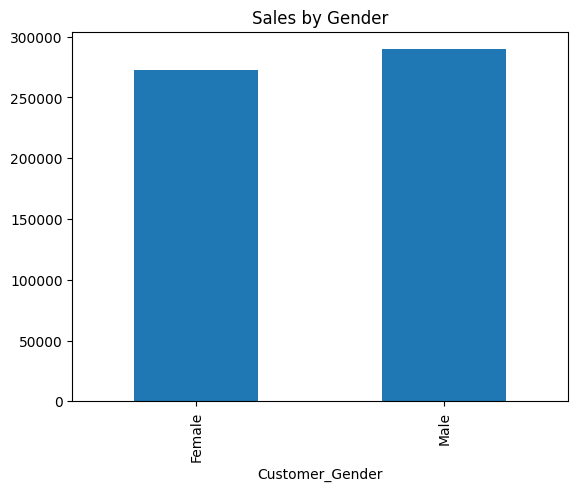

In [8]:
sales_gender = df.groupby("Customer_Gender")["Total_Sales"].sum()

sales_gender.plot(kind="bar", title="Sales by Gender")
plt.show()

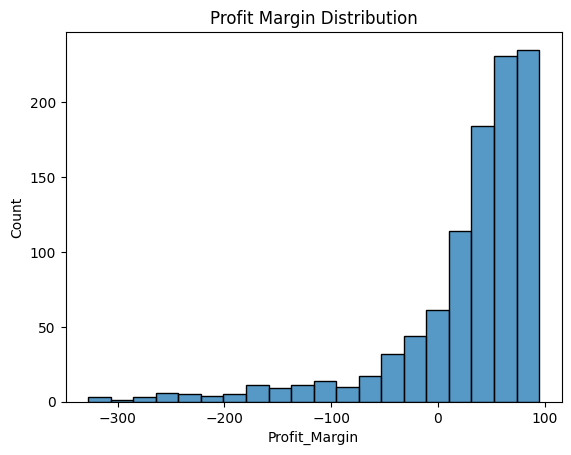

In [9]:
sns.histplot(df["Profit_Margin"], bins=20)
plt.title("Profit Margin Distribution")
plt.show()

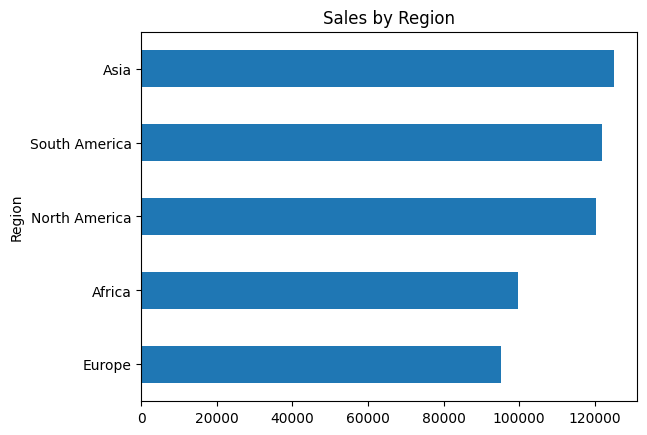

In [10]:
region_sales = df.groupby("Region")["Total_Sales"].sum().sort_values()

region_sales.plot(kind="barh", title="Sales by Region")
plt.show()


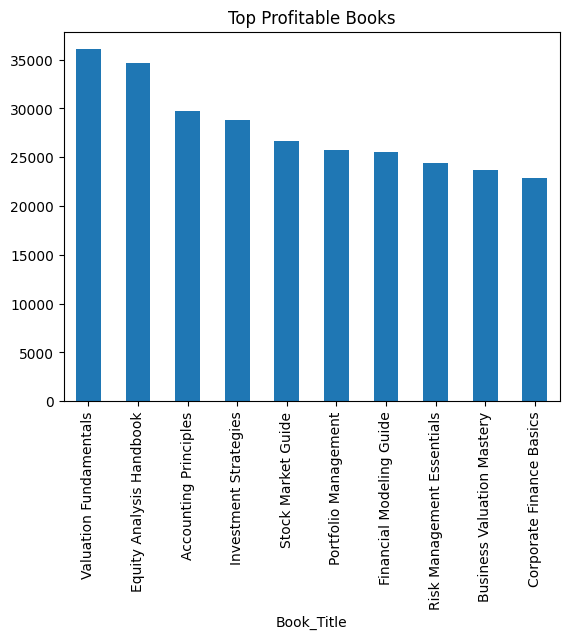

In [11]:
top_books = df.groupby("Book_Title")["Profit"].sum().sort_values(ascending=False).head(10)

top_books.plot(kind="bar", title="Top Profitable Books")
plt.show()